In [3]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 MB 18.8 MB/s eta 0:00:00
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=43d477c26a1831e091bf9f334ecdb6976e27c90dfde931988c4f2d27c7ca67fe
  Stored in directory: /Users/anirudhm/Library/Caches/pip/wheels/4b/a5/2d/4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [9]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 20.5 MB/s eta 0:00:00
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [11]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.5/217.5 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.4/962.4 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 13.2 MB/s eta 0:00:0

In [3]:
from IPython.display import clear_output
clear_output()
import cv2
from sklearn.metrics import classification_report

In [4]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import Bunch

In [1]:
from sklearn import svm, metrics, datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
from pathlib import Path
from sklearn import tree

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from math import *
init_notebook_mode(connected=True)
RANDOM_SEED = 123

NameError: name 'init_notebook_mode' is not defined

In [ ]:
IMG_PATH = 'Dataset/'

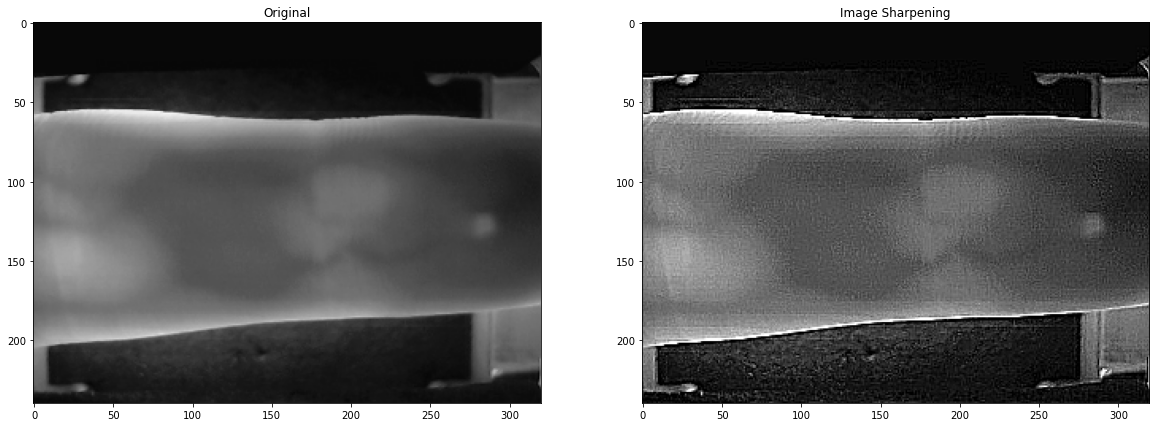

In [ ]:
image = cv2.imread('Dataset/001/index_1.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)


kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(image, -1, kernel_sharpening)


plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)

plt.show()

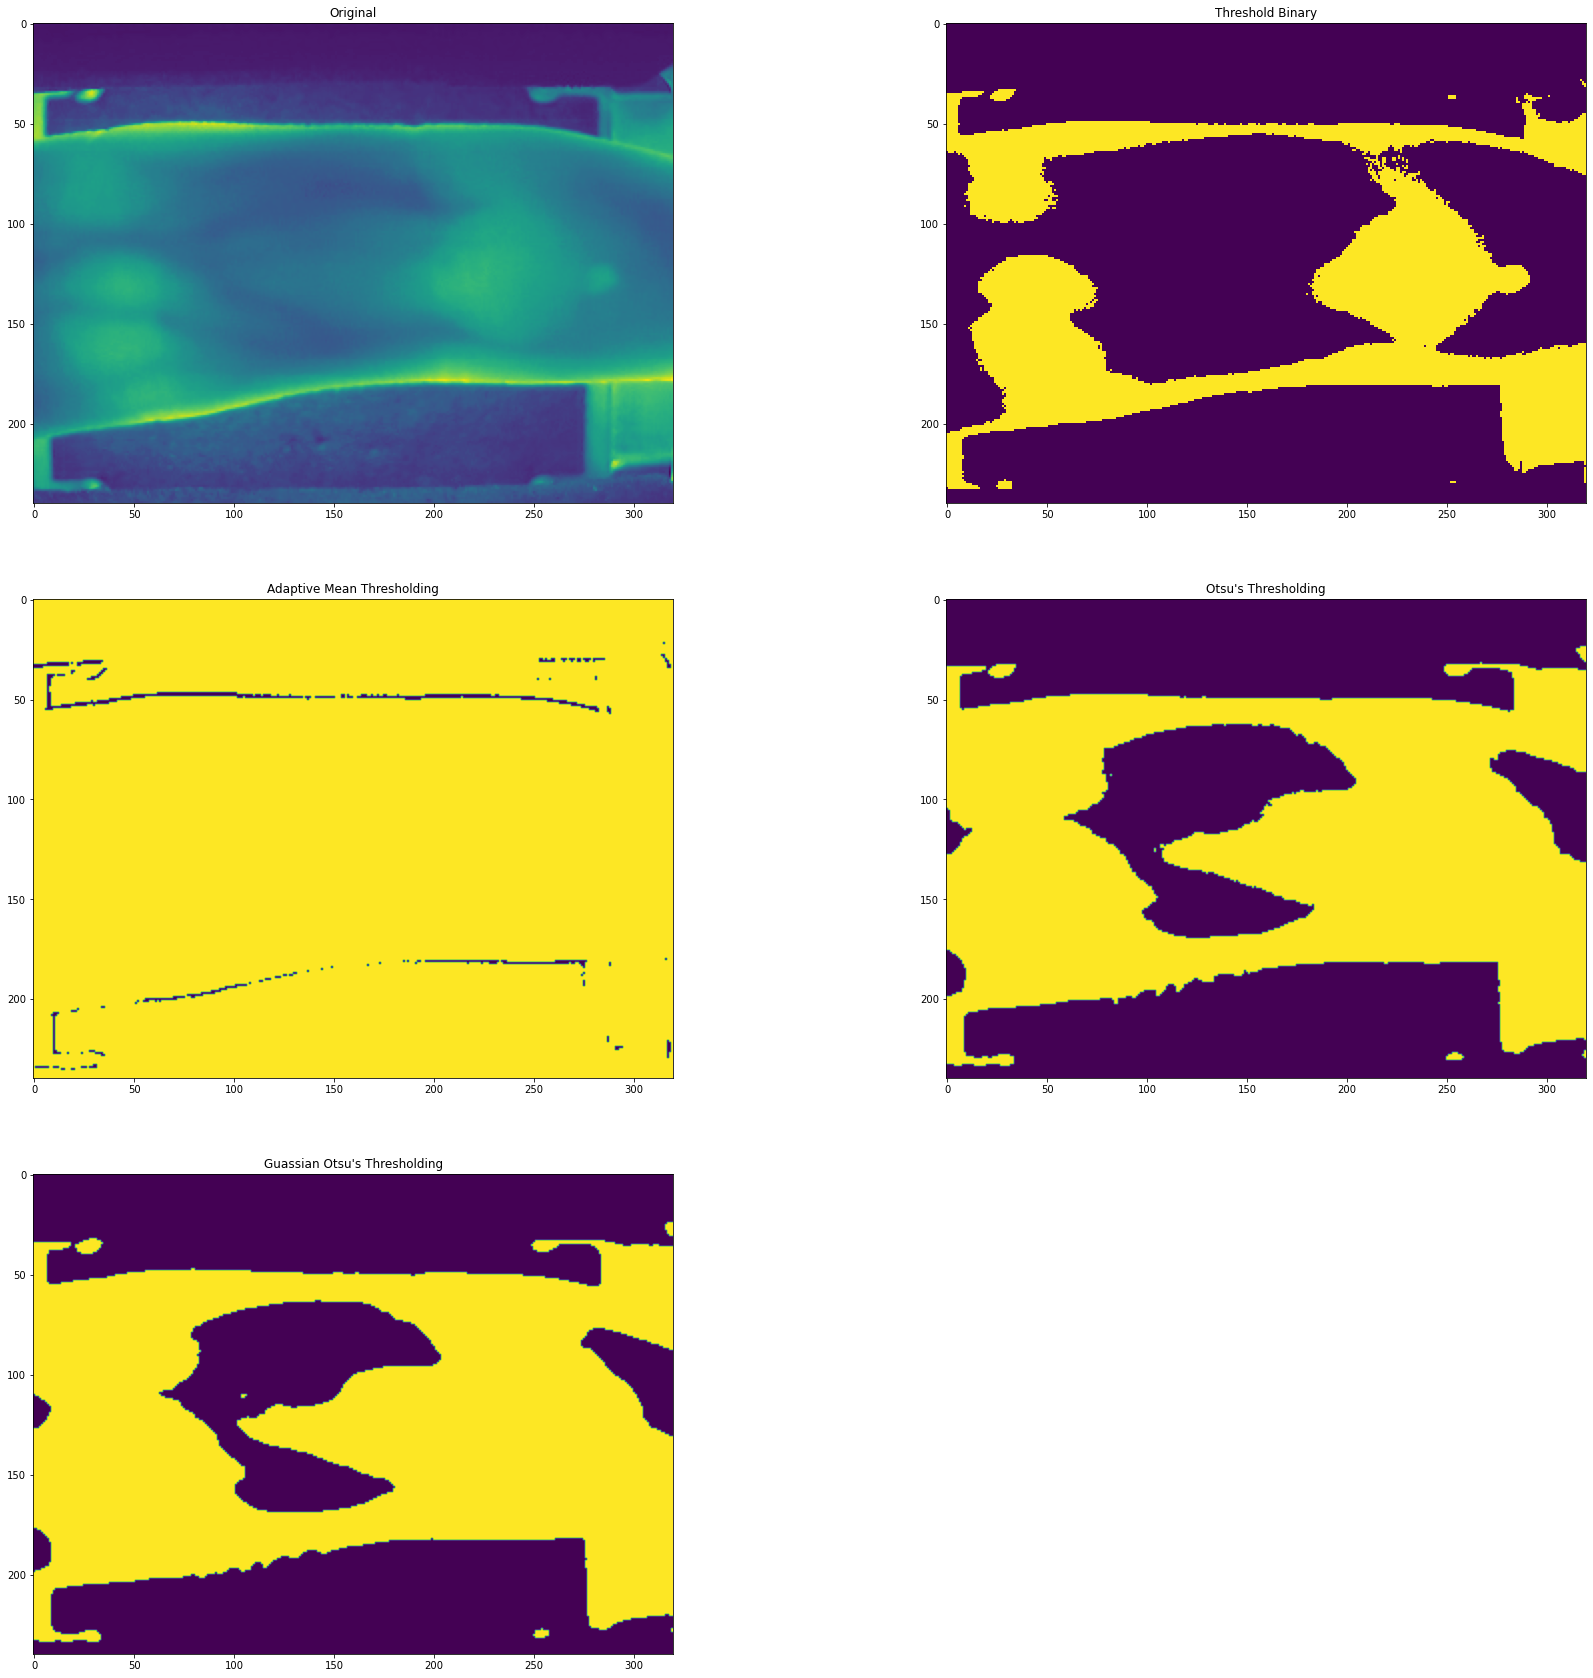

In [ ]:
image = cv2.imread('Dataset/002/index_2.bmp', 0)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1)


image = cv2.GaussianBlur(image, (3, 3), 0)

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 

plt.subplot(3, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh)


_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(3, 2, 4)
plt.title("Otsu's Thresholding")
plt.imshow(th2)


plt.subplot(3, 2, 5)
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

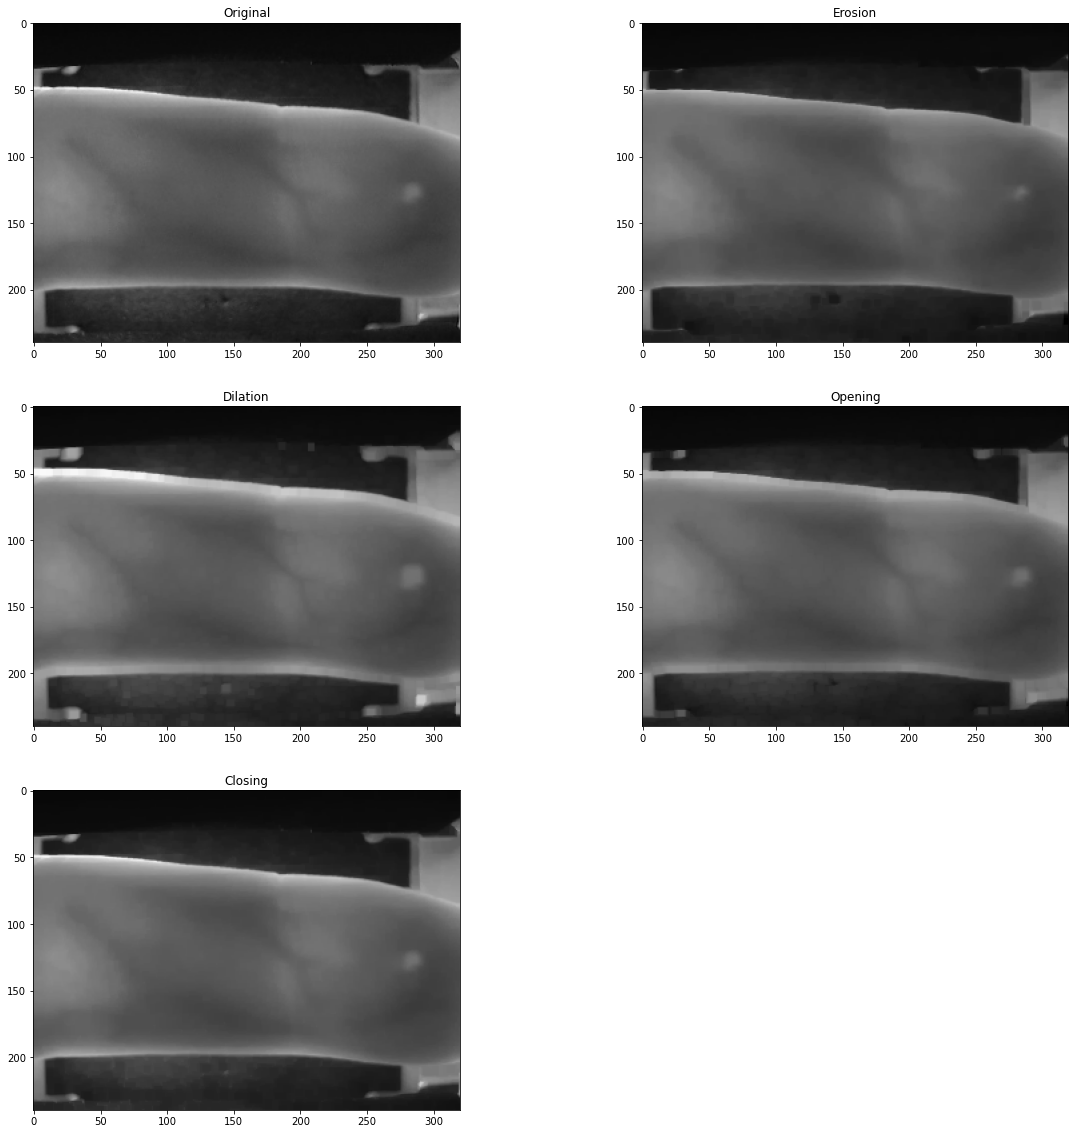

In [ ]:
image = cv2.imread('Dataset/003/index_3.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)


kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(3, 2, 2)
plt.title("Erosion")
plt.imshow(erosion)

# 
dilation = cv2.dilate(image, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title("Dilation")
plt.imshow(dilation)


opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)


closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


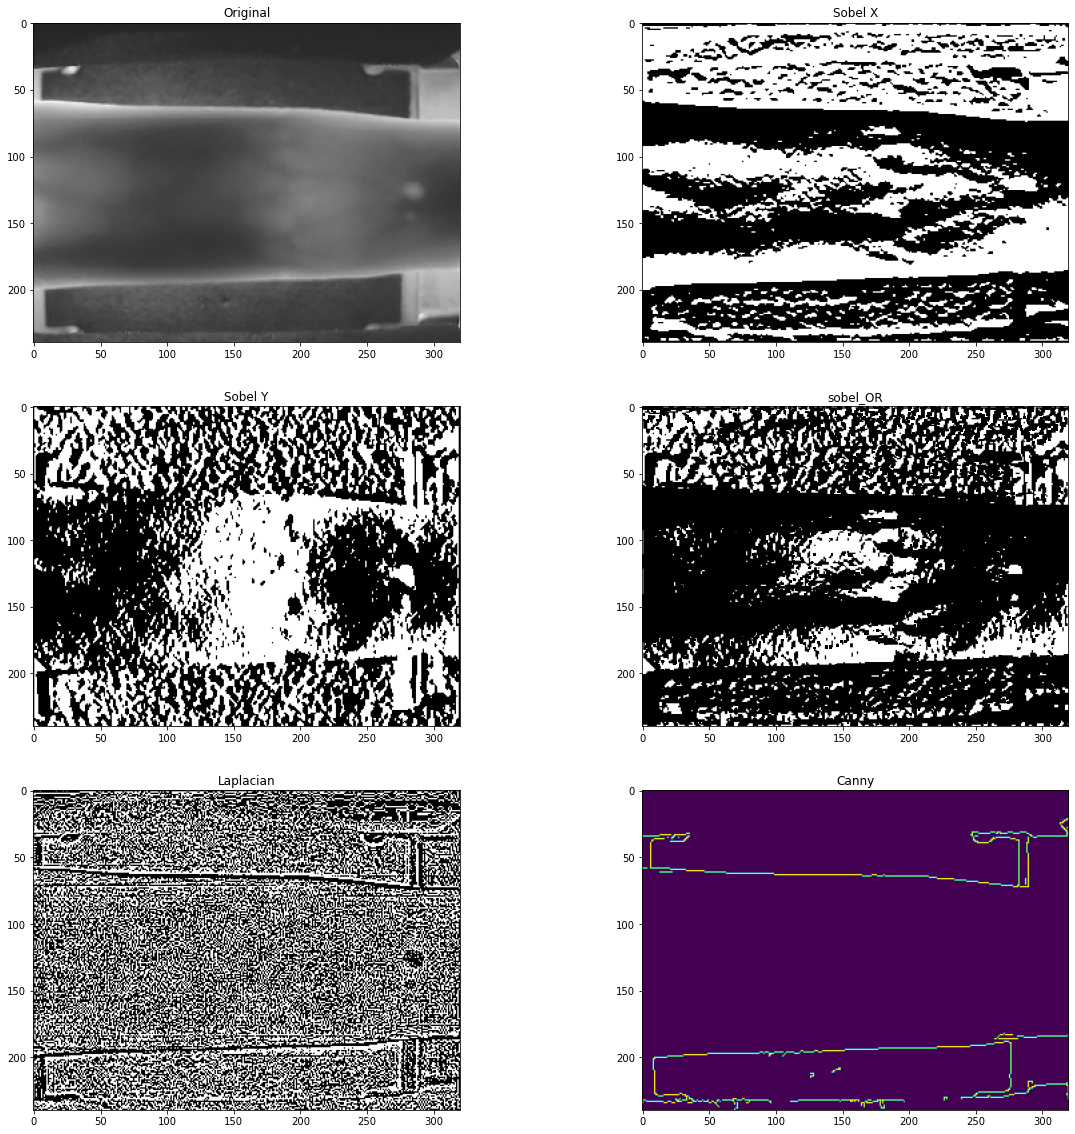

In [ ]:
image = cv2.imread('Dataset/004/middle_1.bmp', 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width,_ = image.shape

sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x)


plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(3, 2, 4)
plt.title("sobel_OR")
plt.imshow(sobel_OR)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)

canny = cv2.Canny(image, 50, 120)

plt.subplot(3, 2, 6)
plt.title("Canny")
plt.imshow(canny)

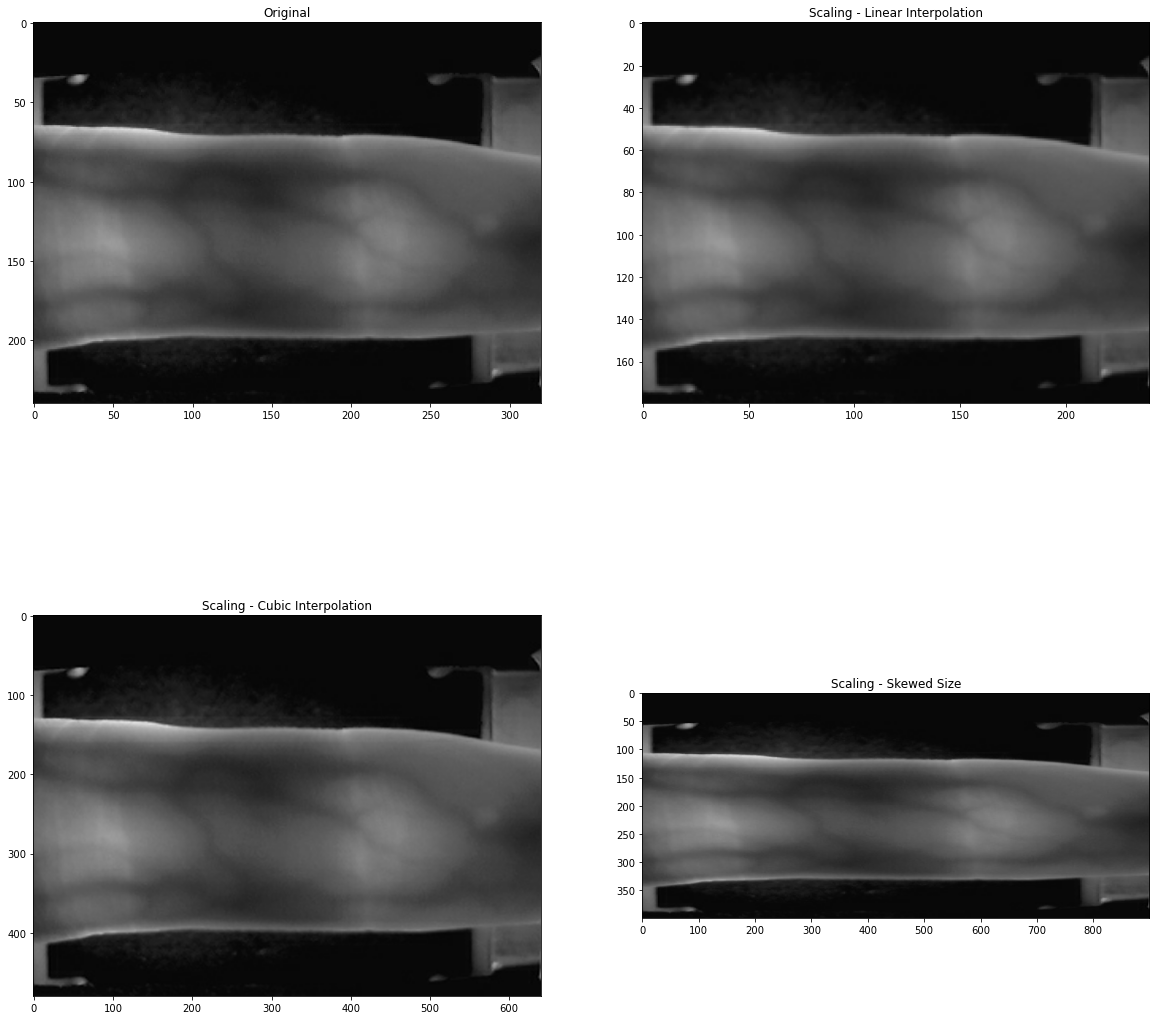

In [ ]:
image = cv2.imread('Dataset/005/index_6.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)

plt.subplot(2, 2, 2)
plt.title("Scaling - Linear Interpolation")
plt.imshow(image_scaled)

img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

plt.subplot(2, 2, 3)
plt.title("Scaling - Cubic Interpolation")
plt.imshow(img_scaled)

img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)

plt.subplot(2, 2, 4)
plt.title("Scaling - Skewed Size")
plt.imshow(img_scaled)

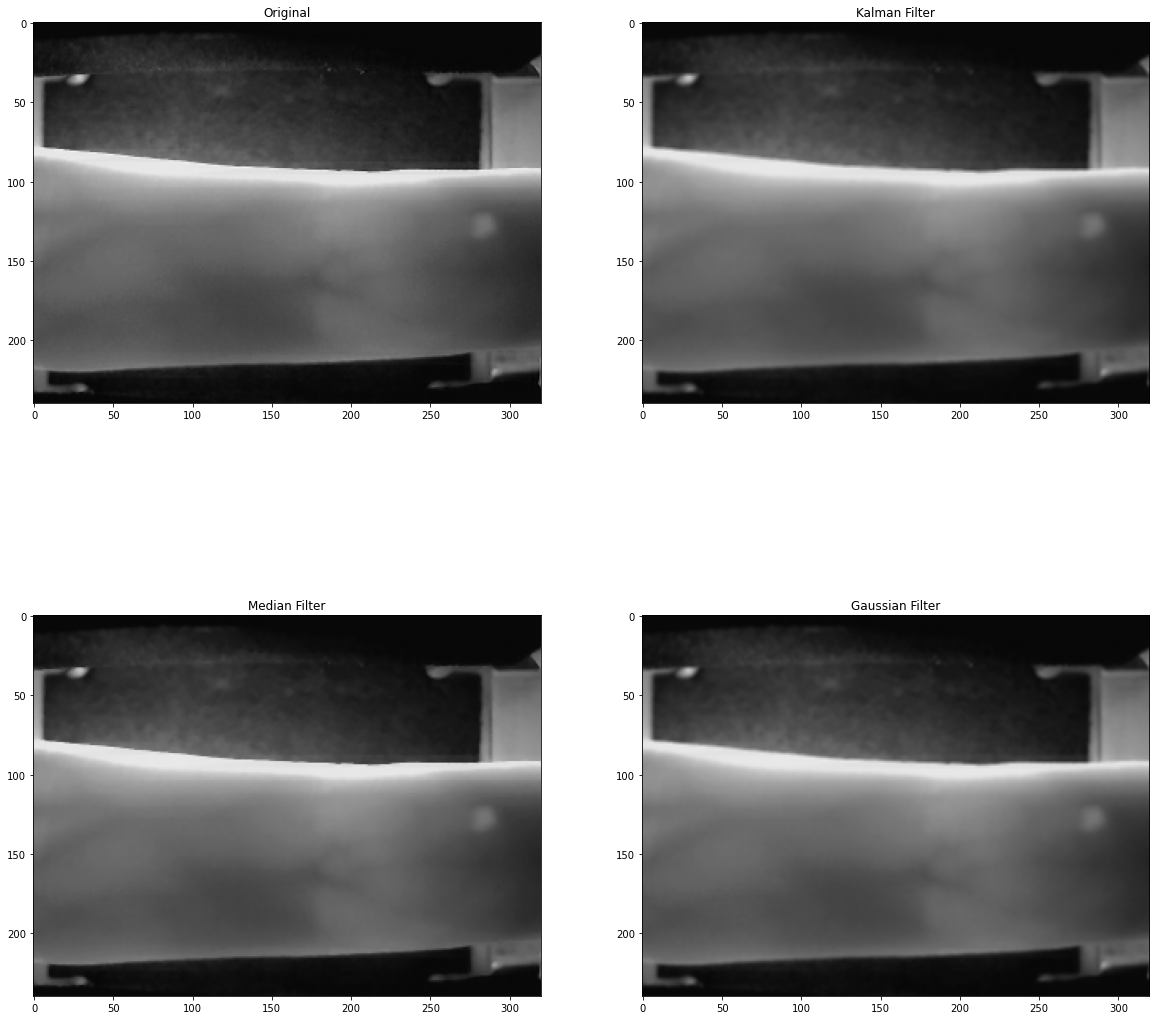

In [ ]:
image = cv2.imread('Dataset/001/ring_6.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

kalman_3x3 = np.ones((3, 3), np.float32) / 9

blurred = cv2.filter2D(image, -1, kalman_3x3)

plt.subplot(2, 2, 2)
plt.title("Kalman Filter")
plt.imshow(blurred)

kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.medianBlur(image, 3)

plt.subplot(2, 2, 3)
plt.title("Median Filter")
plt.imshow(blurred2)

blurred3 = cv2.GaussianBlur(image, (3,3),1)

plt.subplot(2, 2, 4)
plt.title("Gaussian Filter")
plt.imshow(blurred3)

Number of Contours found = 5


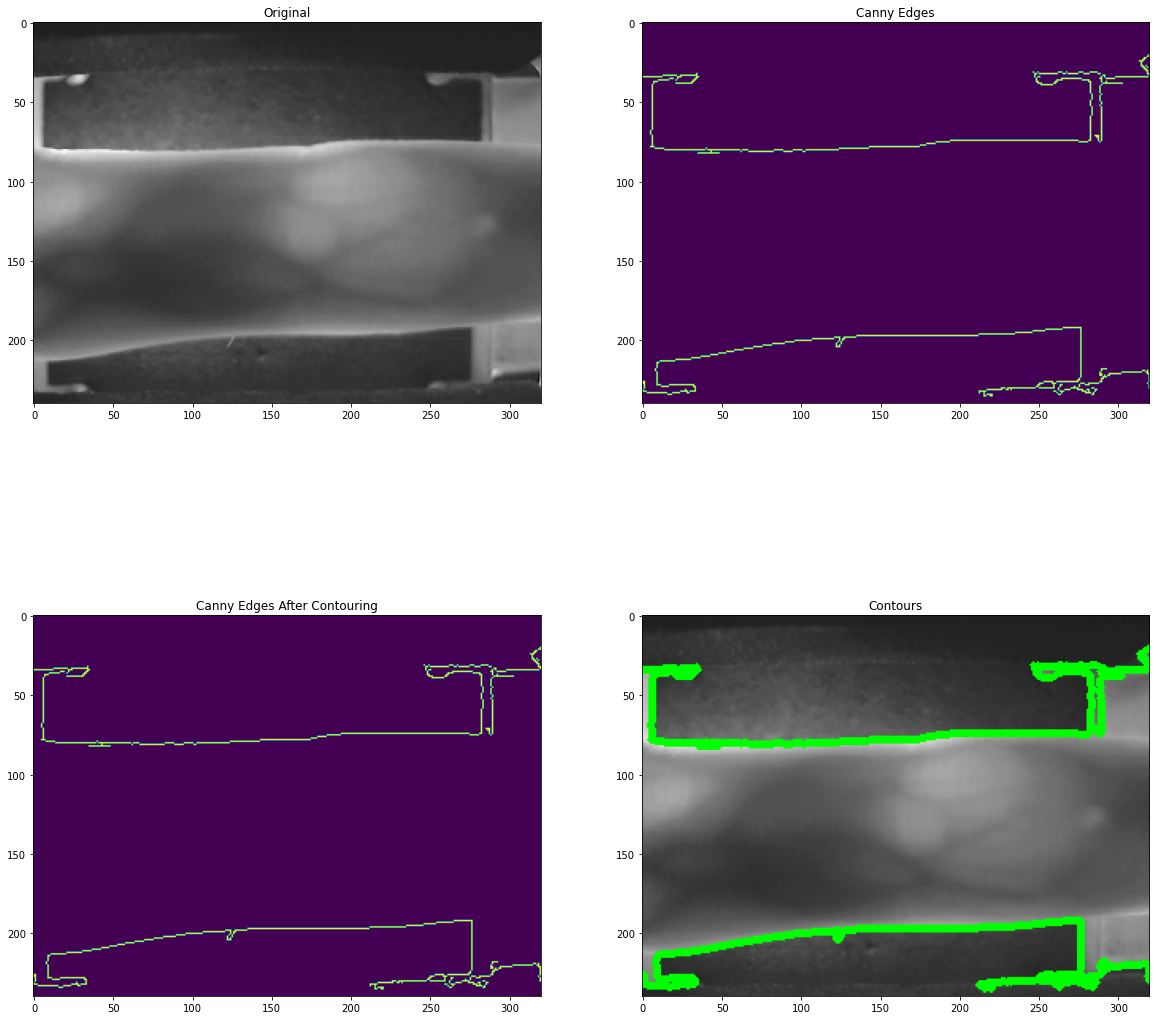

In [ ]:
image = cv2.imread('Dataset/002/ring_4.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)



gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)



contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of Contours found = " + str(len(contours)))


cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)

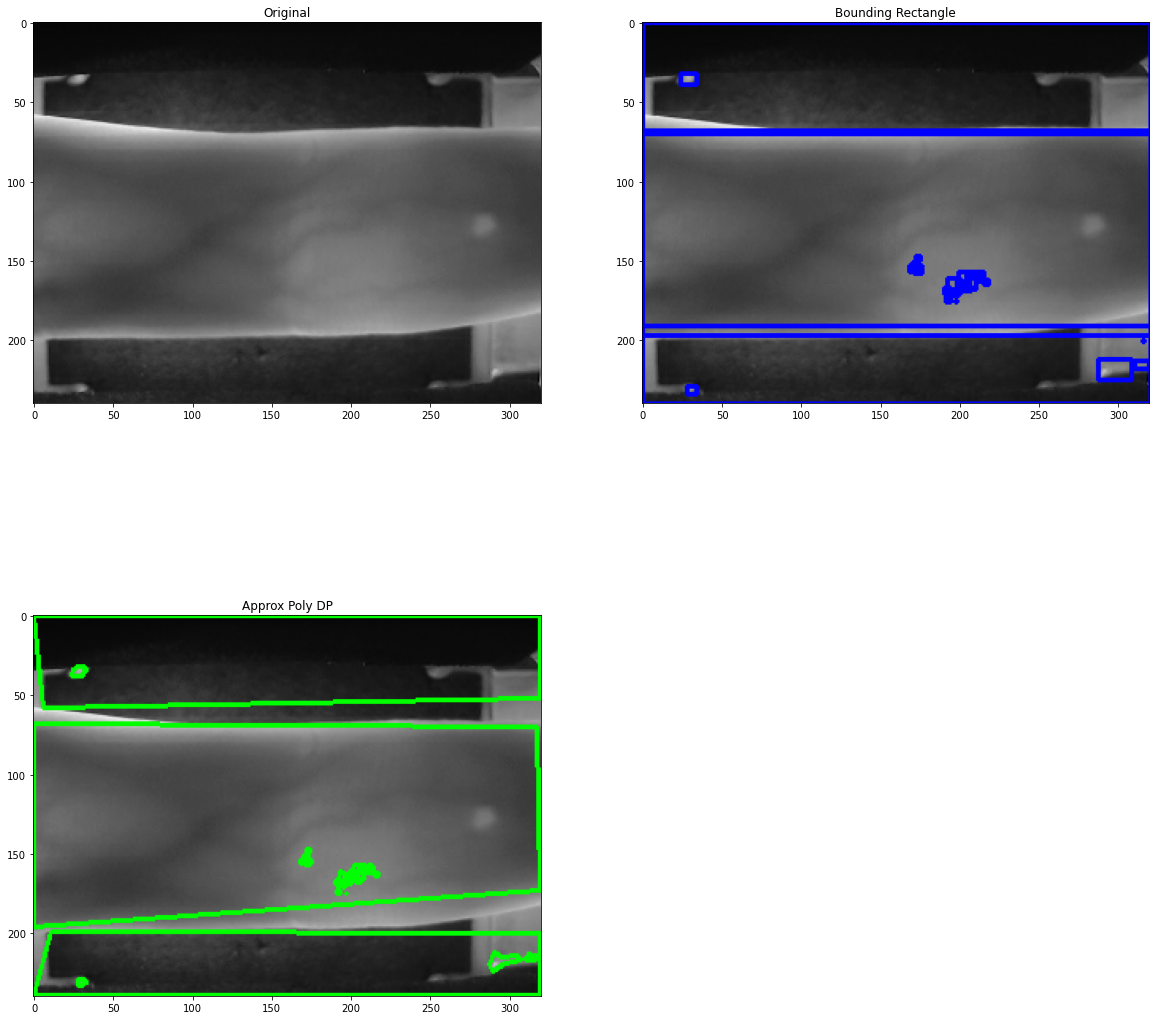

In [ ]:
image = cv2.imread('Dataset/003/ring_4.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

orig_image = image.copy()



gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)


contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    
    plt.subplot(2, 2, 2)
    plt.title("Bounding Rectangle")
    plt.imshow(orig_image)

    

for c in contours:
    
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    
    plt.subplot(2, 2, 3)
    plt.title("Approx Poly DP")
    plt.imshow(image)

plt.show()

In [ ]:
TRAIN_DIR = 'Dataset1/TRAIN/'

In [ ]:
TEST_DIR = 'Dataset1/TEST/'

In [ ]:
VAL_DIR = 'Dataset1/VAL/'

In [ ]:
IMG_SIZE = (240,240)

In [ ]:
def load_data(dir_path, img_size=(240,240)):
    
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 21.81it/s]

100 images loaded from Dataset1/TRAIN/ directory.


In [ ]:
X_test, y_test,test_label = load_data(TEST_DIR, IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 65.77it/s]

35 images loaded from Dataset1/TEST/ directory.


In [ ]:
X_val, y_val, validation_label = load_data(VAL_DIR, IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 81.99it/s]

35 images loaded from Dataset1/VAL/ directory.


In [ ]:
y = dict()

In [ ]:
y[0] = []
y[1] = []

In [ ]:
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

In [ ]:
trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

In [ ]:
def plot_samples(X, y, labels_dict, n=50):
    
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

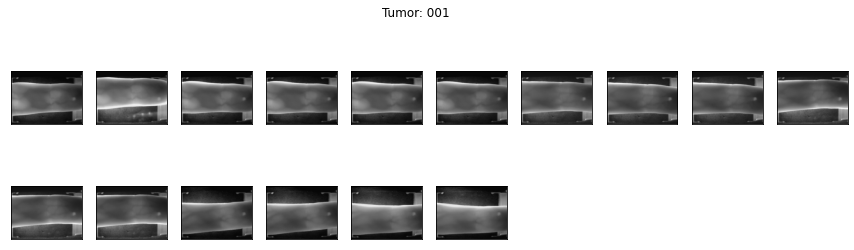

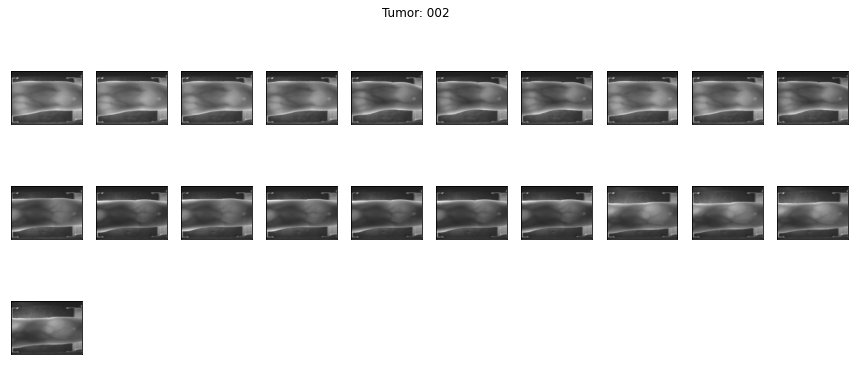

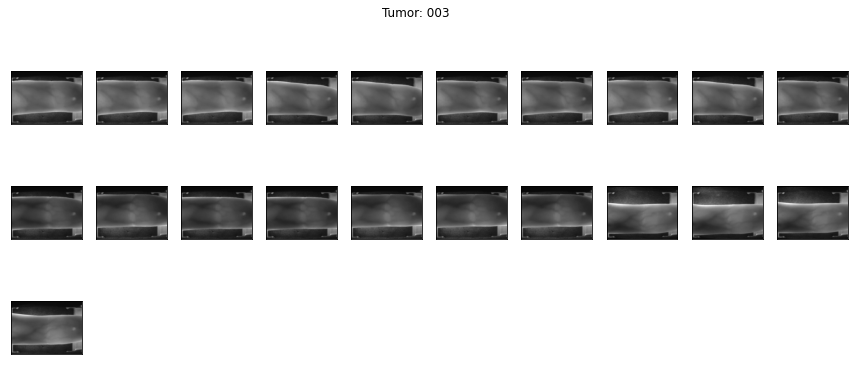

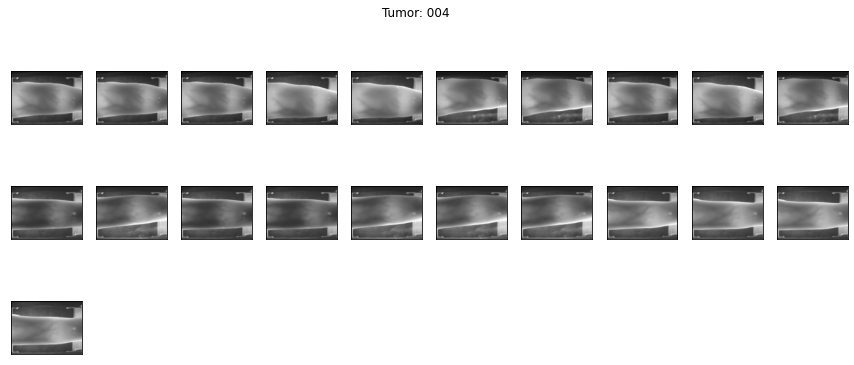

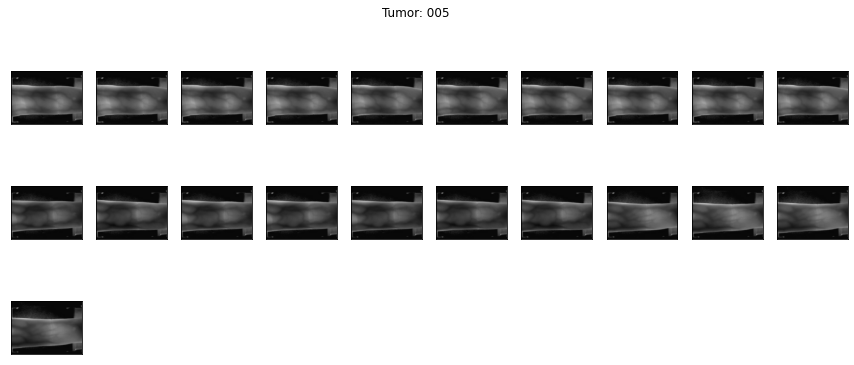

In [ ]:
plot_samples(X_train, y_train, labels, 30)

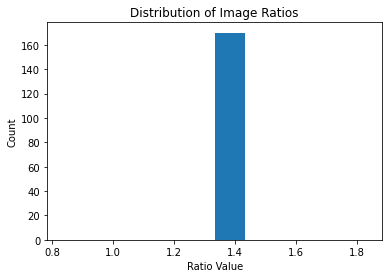

In [ ]:
RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [ ]:
img = cv2.imread('Dataset/001/index_3.bmp')
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
c = max(cnts, key=cv2.contourArea)
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])

In [ ]:
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

In [ ]:
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

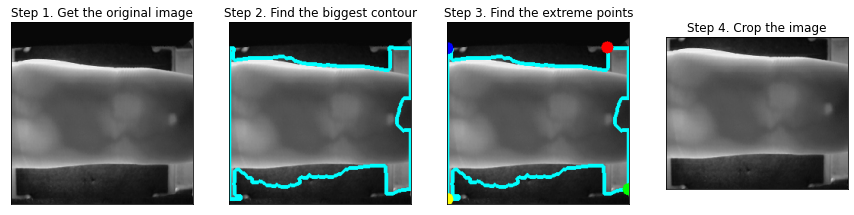

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('Dataset/001/index_3.bmp')
gray_img = rgb2gray(img)

In [ ]:
def multiPyrDown(img, debug=False):
    result = [img]
    temp_img = img.copy()

    print('### Starting Multi-PyrDown ###')
    while temp_img.size > 4:
        if debug:
            print(temp_img.shape)
        temp_img = cv2.pyrDown(temp_img)
        result.append(temp_img)

    print('### Multi-PyrDown, Done with length: {} ###'.format(len(result)))

    return result

In [ ]:
pyr_img = multiPyrDown(gray_img, debug=True)

### Starting Multi-PyrDown ###
(240, 320)
(120, 160)
(60, 80)
(30, 40)
(15, 20)
(8, 10)
(4, 5)
(2, 3)
### Multi-PyrDown, Done with length: 9 ###


In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

In [ ]:
X_train = crop_imgs(set_name=X_train)

C:\Users\RAMN~1\AppData\Local\Temp/ipykernel_9732/3066100312.py:27: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
X_val = crop_imgs(set_name=X_val)

C:\Users\RAMN~1\AppData\Local\Temp/ipykernel_9732/3066100312.py:27: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
X_test = crop_imgs(set_name=X_test)

C:\Users\RAMN~1\AppData\Local\Temp/ipykernel_9732/3066100312.py:27: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



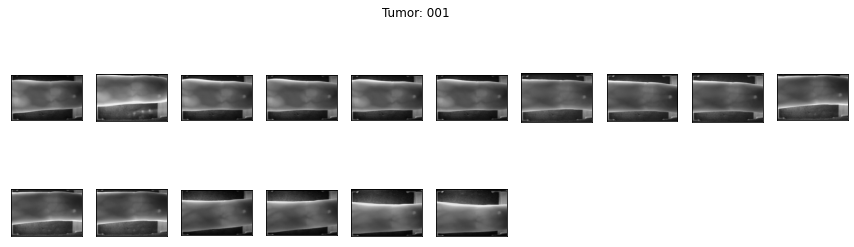

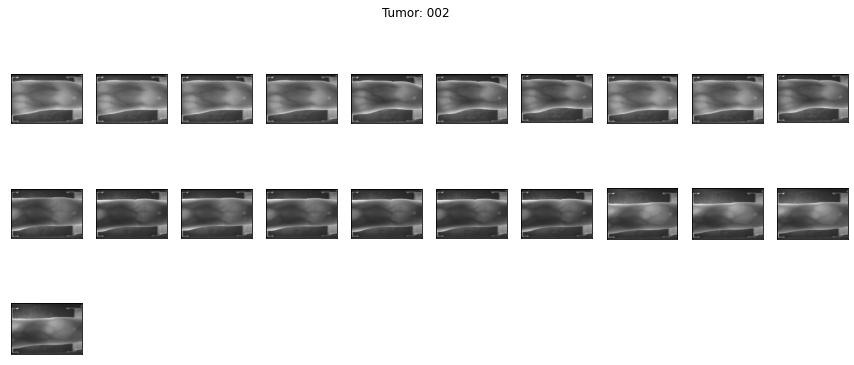

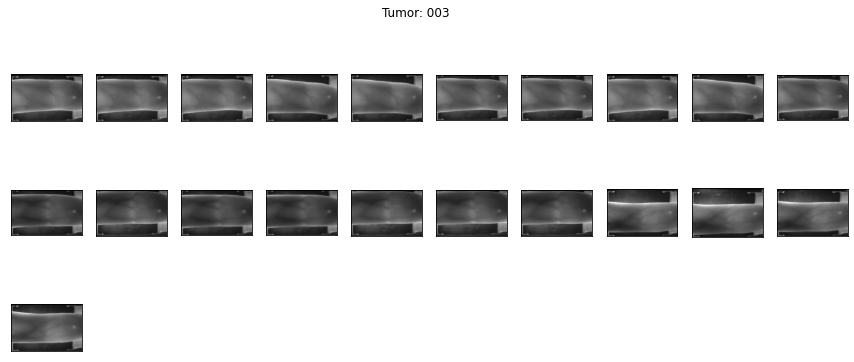

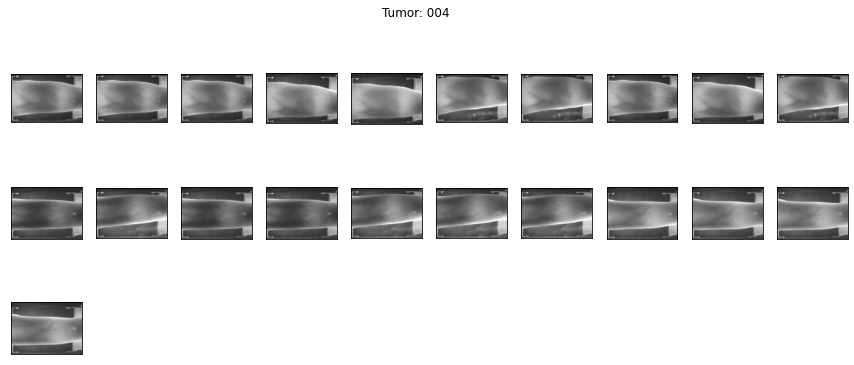

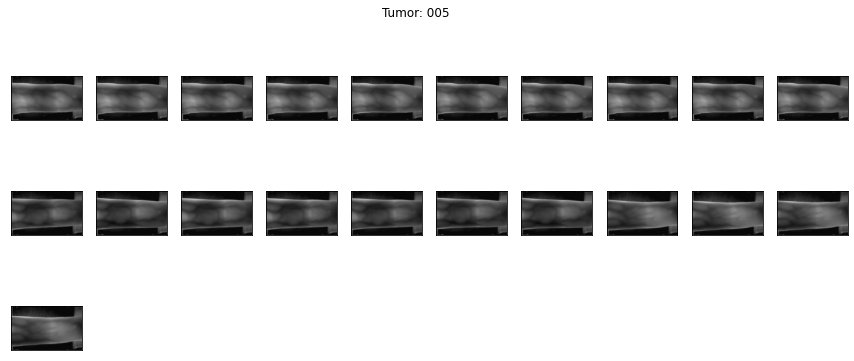

In [ ]:
plot_samples(X_train, y_train, labels, 30)

In [ ]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [ ]:
save_new_images(X_train, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val, y_val, folder_name='VAL_CROP/')
save_new_images(X_test, y_test, folder_name='TEST_CROP/')

In [ ]:
def preprocess_imgs(set_name, img_size):
    
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [ ]:
X_train = preprocess_imgs(set_name=X_train, img_size=IMG_SIZE)
X_test = preprocess_imgs(set_name=X_test, img_size=IMG_SIZE)
X_val = preprocess_imgs(set_name=X_val, img_size=IMG_SIZE)

In [ ]:
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
#os.mkdir('preview')
x = X_train[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


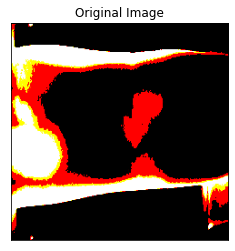

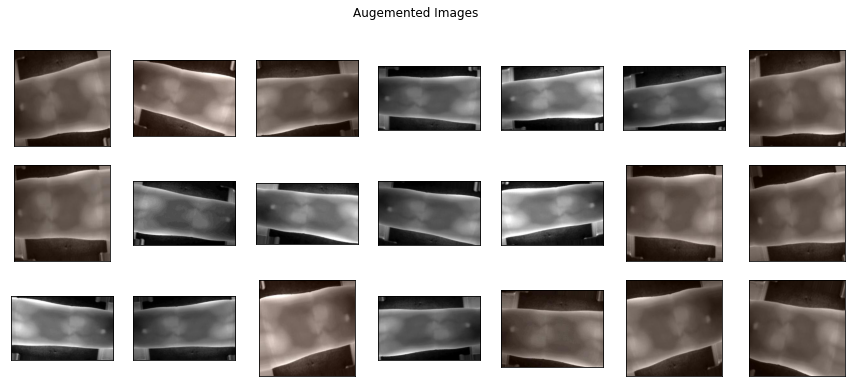

In [ ]:
plt.imshow(X_train [0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [ ]:
train_path = 'Dataset1/Train/'
val_path = 'Dataset1/Val/'
test_path = 'Dataset1/Test/'

In [ ]:
IMAGE_SIZE = [240, 240]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 50
LEARNING_RATE = 0.0007
NUM_CLASSES = 5 # We are aware of it.

In [ ]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

In [ ]:
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['001', '002', '003', '004', '005'] 
 and the length is : 5


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (240, 240),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 100 images belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

In [ ]:
test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (240, 240),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 35 images belonging to 5 classes.


In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
validation_set = validation_datagen.flow_from_directory(
    directory = val_path,
    target_size = (240, 240),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 35 images belonging to 5 classes.


In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(CLASSES)
print(labels)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [ ]:
import pickle

cur_dir = os.getcwd()

output_dir = os.path.join(cur_dir, 'Output')

with open(os.path.join(output_dir,'labels'), 'wb') as f:
    pickle.dump(lb, f)

In [ ]:
#model = VGG16(width=64, height=64, depth=3, classes=len(lb.classes_))

In [ ]:
#vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False,input_shape=(240, 240, 3))

In [ ]:
vgg = VGG16(weights='imagenet', include_top=False,input_shape= IMAGE_SIZE + [3])

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0     

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='my_model.h5', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('my_model.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history = model.fit(training_set,
                            batch_size=BATCH_SIZE,
                            epochs=50,
                            validation_data=(validation_set),
                            steps_per_epoch=len(training_set),
                            validation_steps=len(validation_set))

Epoch 1/30
4/4 [==============================] - 20s 4s/step - loss: 2.8198 - accuracy: 0.2300 - val_loss: 1.4174 - val_accuracy: 0.5143
Epoch 2/30
4/4 [==============================] - 17s 6s/step - loss: 2.2421 - accuracy: 0.2600 - val_loss: 2.2530 - val_accuracy: 0.3429
Epoch 3/30
4/4 [==============================] - 19s 5s/step - loss: 1.5074 - accuracy: 0.4900 - val_loss: 1.3492 - val_accuracy: 0.4286
Epoch 4/30
4/4 [==============================] - 18s 5s/step - loss: 1.4385 - accuracy: 0.4200 - val_loss: 0.8389 - val_accuracy: 0.7429
Epoch 5/30
4/4 [==============================] - 21s 7s/step - loss: 0.9305 - accuracy: 0.6500 - val_loss: 1.3963 - val_accuracy: 0.5429
Epoch 6/30
4/4 [==============================] - 18s 6s/step - loss: 0.9690 - accuracy: 0.7000 - val_loss: 0.8416 - val_accuracy: 0.8000
Epoch 7/30
4/4 [==============================] - 18s 6s/step - loss: 0.7862 - accuracy: 0.6300 - val_loss: 0.7968 - val_accuracy: 0.7143
Epoch 8/30
4/4 [==================

In [ ]:
model_path = os.path.join(output_dir, 'my_model.h5')
model.save(model_path)

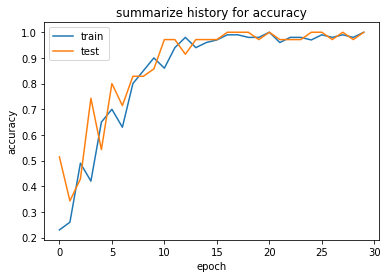

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('summarize history for accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

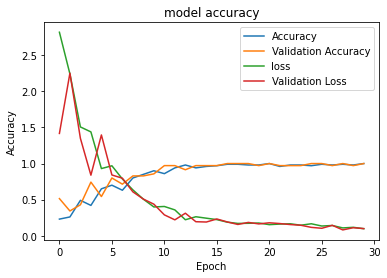

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
#pred = model.predict(test_set, steps=1)
#print(pred)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']

In [ ]:
#predictions = model.predict(X_test, batch_size=32)
#print(classification_report(y_test.argmax(axis=-1),predictions.argmax(axis=-1), target_names=target_names))

In [ ]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('index_1.bmp', target_size=(240, 240))

In [ ]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [ ]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [ ]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [ ]:
# predict the probability across all output classes
yhat = model.predict(image)

In [ ]:
# make predictions
#yhat = model.predict(X_val)
# evaluate predictions
#acc = accuracy_score(X_test, yhat)
#print(acc)

In [ ]:
true_classes = test_set.classes
class_indices = training_set.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

In [ ]:
vgg_preds_ft = model.predict(test_set)
vgg_pred_classes_ft = np.argmax(vgg_preds_ft, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc_ft = accuracy_score(true_classes, vgg_pred_classes_ft)

In [ ]:
#from sklearn.metrics import classification_report

#target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
# evaluate the network
#print(classification_report(true_classes,vgg_pred_classes_ft, target_names=target_names))

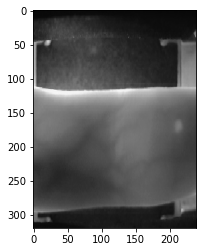

In [ ]:
from keras.preprocessing import image
img = image.load_img("ring_5.bmp",target_size=(320,240))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# returns a compiled model
# identical to the previous one
from keras.models import load_model
saved_model = load_model('my_model.h5')

In [ ]:
vgg_preds = model.predict(test_set)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)
print(vgg_pred_classes)

[1 4 2 1 1 3 2 1 3 0 1 2 2 3 3 3 0 1 3 4 0 3 4 0 0 4 0 1 4 4 2 2 2 4 0]


In [ ]:
print("VGG16 Model Accuracy: {:.2f}%".format(vgg_acc_ft * 100))

VGG16 Model Accuracy: 84.34%
